In [1]:
import os, shutil, random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
import keras
from keras import models
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight, compute_sample_weight

In [2]:
img_dir = 'Human_Face_Regonition_Images'

part_1_dir = os.path.join(img_dir, 'part1')
part_1_dir

'Human_Face_Regonition_Images\\part1'

In [3]:
part_2_dir = os.path.join(img_dir, 'part2')
part_2_dir

'Human_Face_Regonition_Images\\part2'

In [4]:
part_3_dir = os.path.join(img_dir, 'part3')
part_3_dir

'Human_Face_Regonition_Images\\part3'

In [5]:
img_dir = 'Human_Face_Regonition_Images'

In [53]:
# Split Folder
split_dir = os.path.join(img_dir, 'split')
os.mkdir(split_dir)

# Train Folder
train_dir = os.path.join(split_dir, 'train')
os.mkdir(train_dir)

# Validation Folder
validation_dir = os.path.join(split_dir, 'validation')
os.mkdir(validation_dir)

# Test Folder
test_dir = os.path.join(split_dir, 'test')
os.mkdir(test_dir)

In [54]:
total_imgs_dir = 'Human_Face_Regonition_Images\\images\\'

total_imgs= [file for file in os.listdir(total_imgs_dir) if file.endswith('.jpg')]

train_imgs = random.sample(total_imgs, 14000)

for img in train_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(train_dir, img)
    shutil.copyfile(origin, destination)

In [55]:
rest_imgs = [image for image in total_imgs if image not in train_imgs]

validation_imgs = random.sample(rest_imgs, 7000)

for img in validation_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(validation_dir, img)
    shutil.copyfile(origin, destination)

In [56]:
test_imgs = [image for image in rest_imgs if image not in validation_imgs]

for img in test_imgs:
    origin = os.path.join(total_imgs_dir, img)
    destination = os.path.join(test_dir, img)
    shutil.copyfile(origin, destination)

In [7]:
imgs = [mpimg.imread(total_imgs_dir+img) for img in random.sample(total_imgs,5)]

for n in range(5):
    plt.imshow(imgs[n])
    plt.show()

NameError: name 'total_imgs' is not defined

In [6]:
train_ages = [name.split('_')[0] for name in train_imgs]

train_labels = pd.DataFrame({'age' : train_ages})
train_labels['age'] = train_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

train_labels.head()

NameError: name 'train_imgs' is not defined

I am splitting the ages as 0-13, 14-16, 17-19, 20-23, 24-30, 31-40, 41-60, 60+. Since this project focuses on screening for minors, I focused on ages 14-23. To make sure these ages get correctly labeled, I shortened the ranges of the age on ages 14-23.

In [59]:
bins = [0, 13, 16, 20, 23, 30, 40, 60, np.inf]
names = ['0-13', '14-16', '17-20', '21-23', '24-30', '31-40', '41-60', '60+']

train_labels['AgeRange'] = pd.cut(train_labels['age'], bins, labels=names)

In [60]:
train_labels.head()

,age,AgeRange
0,20,17-20
1,1,0-13
2,28,24-30
3,53,41-60
4,33,31-40


In [62]:
# Get indexes of each age bins
age_0_13_index = list(train_labels[train_labels['AgeRange'] == '0-13'].index)
age_14_16_index = list(train_labels[train_labels['AgeRange'] == '14-16'].index)
age_17_20_index = list(train_labels[train_labels['AgeRange'] == '17-20'].index)
age_21_23_index = list(train_labels[train_labels['AgeRange'] == '21-23'].index)
age_24_30_index = list(train_labels[train_labels['AgeRange'] == '24-30'].index)
age_31_40_index = list(train_labels[train_labels['AgeRange'] == '31-40'].index)
age_41_60_index = list(train_labels[train_labels['AgeRange'] == '41-60'].index)
age_60_up_index = list(train_labels[train_labels['AgeRange'] == '60+'].index)

In [64]:
age_0_13_imgs = [train_imgs[index] for index in age_0_13_index]
age_14_16_imgs = [train_imgs[index] for index in age_14_16_index]
age_17_20_imgs = [train_imgs[index] for index in age_17_20_index]
age_21_23_imgs = [train_imgs[index] for index in age_21_23_index]
age_24_30_imgs = [train_imgs[index] for index in age_24_30_index]
age_31_40_imgs = [train_imgs[index] for index in age_31_40_index]
age_41_60_imgs = [train_imgs[index] for index in age_41_60_index]
age_60_up_imgs = [train_imgs[index] for index in age_60_up_index]

In [22]:
def copy_image_to_new_folder(images, list_name, folder_name):
    os.mkdir(os.path.join(folder_name, list_name))
    
    for img in images:
        origin = os.path.join(folder_name, img)
        destination = os.path.join(os.path.join(folder_name, list_name), img)
        shutil.copyfile(origin, destination)

In [65]:
copy_image_to_new_folder(age_0_13_imgs, 'age_0_13_imgs', train_dir)
copy_image_to_new_folder(age_14_16_imgs, 'age_14_16_imgs', train_dir)
copy_image_to_new_folder(age_17_20_imgs, 'age_17_20_imgs', train_dir)
copy_image_to_new_folder(age_21_23_imgs, 'age_21_23_imgs', train_dir)
copy_image_to_new_folder(age_24_30_imgs, 'age_24_30_imgs', train_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', train_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', train_dir)
copy_image_to_new_folder(age_60_up_imgs, 'age_60_up_imgs', train_dir)

In [66]:
validation_ages = [name.split('_')[0] for name in validation_imgs]

validation_labels = pd.DataFrame({'age' : validation_ages})
validation_labels['age'] = validation_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

In [67]:
bins = [0, 13, 16, 20, 23, 30, 40, 60, np.inf]
names = ['0-13', '14-16', '17-20', '21-23', '24-30', '31-40', '41-60', '60+']

validation_labels['AgeRange'] = pd.cut(validation_labels['age'], bins, labels=names)

In [68]:
validation_labels.head()

,age,AgeRange
0,65,60+
1,36,31-40
2,28,24-30
3,14,14-16
4,1,0-13


In [69]:
age_0_13_index = list(validation_labels[validation_labels['AgeRange'] == '0-13'].index)
age_14_16_index = list(validation_labels[validation_labels['AgeRange'] == '14-16'].index)
age_17_20_index = list(validation_labels[validation_labels['AgeRange'] == '17-20'].index)
age_21_23_index = list(validation_labels[validation_labels['AgeRange'] == '21-23'].index)
age_24_30_index = list(validation_labels[validation_labels['AgeRange'] == '24-30'].index)
age_31_40_index = list(validation_labels[validation_labels['AgeRange'] == '31-40'].index)
age_41_60_index = list(validation_labels[validation_labels['AgeRange'] == '41-60'].index)
age_60_up_index = list(validation_labels[validation_labels['AgeRange'] == '60+'].index)

In [70]:
age_0_13_imgs = [validation_imgs[index] for index in age_0_13_index]
age_14_16_imgs = [validation_imgs[index] for index in age_14_16_index]
age_17_20_imgs = [validation_imgs[index] for index in age_17_20_index]
age_21_23_imgs = [validation_imgs[index] for index in age_21_23_index]
age_24_30_imgs = [validation_imgs[index] for index in age_24_30_index]
age_31_40_imgs = [validation_imgs[index] for index in age_31_40_index]
age_41_60_imgs = [validation_imgs[index] for index in age_41_60_index]
age_60_up_imgs = [validation_imgs[index] for index in age_60_up_index]

In [71]:
copy_image_to_new_folder(age_0_13_imgs, 'age_0_13_imgs', validation_dir)
copy_image_to_new_folder(age_14_16_imgs, 'age_14_16_imgs', validation_dir)
copy_image_to_new_folder(age_17_20_imgs, 'age_17_20_imgs', validation_dir)
copy_image_to_new_folder(age_21_23_imgs, 'age_21_23_imgs', validation_dir)
copy_image_to_new_folder(age_24_30_imgs, 'age_24_30_imgs', validation_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', validation_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', validation_dir)
copy_image_to_new_folder(age_60_up_imgs, 'age_60_up_imgs', validation_dir)

In [72]:
test_ages = [name.split('_')[0] for name in test_imgs]

test_labels = pd.DataFrame({'age' : test_ages})
test_labels['age'] = test_labels['age'].map(lambda x: int(float(x.replace('"', ''))))

In [73]:
bins = [0, 13, 16, 20, 23, 30, 40, 60, np.inf]
names = ['0-13', '14-16', '17-20', '21-23', '24-30', '31-40', '41-60', '60+']

test_labels['AgeRange'] = pd.cut(test_labels['age'], bins, labels=names)

In [74]:
test_labels.head()

,age,AgeRange
0,10,0-13
1,10,0-13
2,10,0-13
3,10,0-13
4,10,0-13


In [75]:
age_0_13_index = list(test_labels[test_labels['AgeRange'] == '0-13'].index)
age_14_16_index = list(test_labels[test_labels['AgeRange'] == '14-16'].index)
age_17_20_index = list(test_labels[test_labels['AgeRange'] == '17-20'].index)
age_21_23_index = list(test_labels[test_labels['AgeRange'] == '21-23'].index)
age_24_30_index = list(test_labels[test_labels['AgeRange'] == '24-30'].index)
age_31_40_index = list(test_labels[test_labels['AgeRange'] == '31-40'].index)
age_41_60_index = list(test_labels[test_labels['AgeRange'] == '40-60'].index)
age_60_up_index = list(test_labels[test_labels['AgeRange'] == '60+'].index)

In [76]:
age_0_13_imgs = [test_imgs[index] for index in age_0_13_index]
age_14_16_imgs = [test_imgs[index] for index in age_14_16_index]
age_17_20_imgs = [test_imgs[index] for index in age_17_20_index]
age_21_23_imgs = [test_imgs[index] for index in age_21_23_index]
age_24_30_imgs = [test_imgs[index] for index in age_24_30_index]
age_31_40_imgs = [test_imgs[index] for index in age_31_40_index]
age_41_60_imgs = [test_imgs[index] for index in age_41_60_index]
age_60_up_imgs = [test_imgs[index] for index in age_60_up_index]

In [77]:
copy_image_to_new_folder(age_0_13_imgs, 'age_0_13_imgs', test_dir)
copy_image_to_new_folder(age_14_16_imgs, 'age_14_16_imgs', test_dir)
copy_image_to_new_folder(age_17_20_imgs, 'age_17_20_imgs', test_dir)
copy_image_to_new_folder(age_21_23_imgs, 'age_21_23_imgs', test_dir)
copy_image_to_new_folder(age_24_30_imgs, 'age_24_30_imgs', test_dir)
copy_image_to_new_folder(age_31_40_imgs, 'age_31_40_imgs', test_dir)
copy_image_to_new_folder(age_41_60_imgs, 'age_41_60_imgs', test_dir)
copy_image_to_new_folder(age_60_up_imgs, 'age_60_up_imgs', test_dir)

In [78]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_dir, 
        target_size=(64, 64), batch_size=14000, colo)

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_dir, 
        target_size=(64, 64), batch_size=7000)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(64, 64), batch_size=3108)

Found 14000 images belonging to 8 classes.
Found 7000 images belonging to 8 classes.
Found 2513 images belonging to 8 classes.


In [79]:
train_generator.class_indices

{'age_0_13_imgs': 0,
 'age_14_16_imgs': 1,
 'age_17_20_imgs': 2,
 'age_21_23_imgs': 3,
 'age_24_30_imgs': 4,
 'age_31_40_imgs': 5,
 'age_41_60_imgs': 6,
 'age_60_up_imgs': 7}

In [81]:
train_imgs, train_labels = next(train_generator)
validation_imgs, validation_labels = next(validation_generator)
test_imgs, test_labels = next(test_generator)

In [82]:
print(train_imgs.shape, validation_imgs.shape, test_imgs.shape)

(14000, 64, 64, 3) (7000, 64, 64, 3) (2513, 64, 64, 3)


In [83]:
print(train_labels.shape, validation_labels.shape, test_labels.shape)

(14000, 8) (7000, 8) (2513, 8)


In [84]:
train_images = train_imgs.reshape(train_imgs.shape[0], -1)
validation_images = validation_imgs.reshape(validation_imgs.shape[0], -1)
test_images = test_imgs.reshape(test_imgs.shape[0], -1)

print(train_images.shape, validation_images.shape, test_images.shape)

(14000, 12288) (7000, 12288) (2513, 12288)


In [90]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(64, 64, 3)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = model.fit(train_imgs,
                    train_labels,
                    epochs=50,
                    batch_size=64,
                    validation_data=(validation_imgs, validation_labels))

Epoch 1/50


ValueError: in user code:

    C:\Users\soohy\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\soohy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\soohy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\soohy\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\soohy\anaconda3\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\soohy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\soohy\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\soohy\anaconda3\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\soohy\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 8) and (None, 64, 64, 8) are incompatible


In [44]:
def plot_loss_accuracy(result):
    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

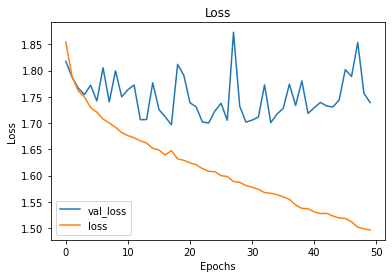

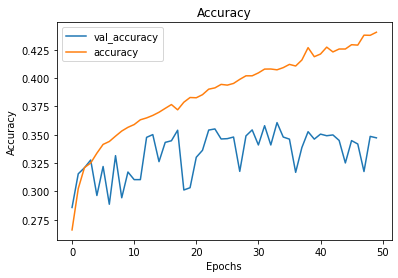

In [86]:
plot_loss_accuracy(result)

In [87]:
result_train = model.evaluate(train_images, train_labels)
result_train

438/438 [==============================] - 1s 1ms/step - loss: 1.4254 - accuracy: 0.4698


[1.4254364967346191, 0.4697857201099396]

In [88]:
result_test = model.evaluate(test_images, test_labels)
result_test

79/79 [==============================] - 0s 1ms/step - loss: 1.7651 - accuracy: 0.3482


[1.7651172876358032, 0.34818941354751587]

## CNN

In [89]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="SGD",
              metrics=['accuracy'])

result = model.fit(train_imgs,
                    train_labels,
                    epochs=25,
                    batch_size=64,
                    validation_data=(validation_imgs, validation_labels))

Epoch 1/25
219/219 [==============================] - 28s 125ms/step - loss: 1.9360 - accuracy: 0.2637 - val_loss: 1.8648 - val_accuracy: 0.2791
Epoch 2/25
219/219 [==============================] - 27s 123ms/step - loss: 1.8448 - accuracy: 0.2788 - val_loss: 1.8464 - val_accuracy: 0.3130
Epoch 3/25
219/219 [==============================] - 27s 124ms/step - loss: 1.8298 - accuracy: 0.2902 - val_loss: 1.8293 - val_accuracy: 0.3124
Epoch 4/25
219/219 [==============================] - 28s 129ms/step - loss: 1.8165 - accuracy: 0.3011 - val_loss: 1.8228 - val_accuracy: 0.2846
Epoch 5/25
219/219 [==============================] - 27s 123ms/step - loss: 1.8003 - accuracy: 0.3035 - val_loss: 1.7901 - val_accuracy: 0.3123
Epoch 6/25
219/219 [==============================] - 30s 137ms/step - loss: 1.7806 - accuracy: 0.3130 - val_loss: 1.7697 - val_accuracy: 0.3267
Epoch 7/25
219/219 [==============================] - 31s 141ms/step - loss: 1.7615 - accuracy: 0.3224 - val_loss: 1.7532 - val_ac